**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==
Professores: Renato Rocha Souza


Monitora: Maria Gabriela Gontijo

**Tema: Análise de Sentimento Segmentado no Varejo - Um comparativo de modelos**
==
Alunos: Marlon Marques Almeida e Thamiris

Data: 21/01/2022

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else: 
  print(gpu_info)

Not connected to a GPU


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from google.colab import drive 
drive.mount('/content/drive')
np.random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#pip install nltk

In [4]:
import requests as re
import re # for regex
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#cd deepprojetos

*I - Bussiness Understanding*
==

Objetive: Get predicted and classify a text to capture negative reviews in an e-commerce system to treat these classifications more quickly and assertively, enabling a reconquest approach avoiding customer loss
Assess situation:
Data mining goals:Descriptive analysis of data, treatment of missing values, and interpretation for evaluation of data unbalance

==

> O que é feedback negativo?

Hoje em dia, o feedback é toda e qualquer opinião e avaliação do cliente a respeito de algo que comprou.

Ele aponta as insatisfações dos clientes e quais os pontos que a empresa deve melhorar ou se aprimorar. Por isso, é enganoso acreditar que um feedback negativo é algo ruim, que determina apenas que seus serviços não possuem excelência. Um feedback negativo deve ser visto como uma forma de aprimorar o que você vende e/ou seus serviços.

> Quanto custa uma avaliação negativa para sua empresa?

Um levantamento realizado pela Zuberance, uma das principais empresas de marketing de defensores dos Estados Unidos, estima o impacto negativo do marketing boca a boca pode atingir 25% de sua receita anual. Portanto, para uma empresa que estima movimentar R$ 1 milhão ao longo do ano, ter avaliações ruinso marketing boca a boca pode reduzir em R$ 250 mil este faturamento.

Esses números podem parecer muito elevados, mas é preciso entender que as consequências das avaliações negativas podem ser sentidas em várias frentes. Alguns dos impactos mais percebidos:

– Diminuição das vendas e da receita total da empresa: os clientes deixam de comprar ao saber que outras pessoas ficaram insatisfeitas com um produto ou serviço;

– Redução da lealdade dos consumidores: eles deixam de comprar mais de uma vez com uma empresa, especialmente se estiverem insatisfeitos;

– Aumento na dificuldade para atrair e reter colaboradores: devido aos maus comentários, muitas pessoas pensam duas vezes antes de se envolver nestes negócios, inclusive como funcionários.

– Capacidade de atração de parceiros e investidores: é preciso muito mais esforço para convencer pessoas de que seus produtos e serviços têm qualidade e valem o aporte de recursos.


https://peepi.com.br/blog/avaliacao-negativa/

https://sernotavel.com.br/o-que-e-um-feedback-negativo-e-como-afeta-um-negocio-digital/




*II - Data Understanding*
==
Collect initial data:
Describe data:
Explore data:
Verify data quality:


**Importing the datasets**

In [6]:
#https://www.kaggle.com/muhammedabdulazeem/amazon-electronics-items-reviews
##Importing the datasets

#df2 = pd.read_csv(r"C://Users//marlo//deepprojetos//amazonReview.csv")
#df = pd.read_csv(r"C://Users//marlo//deepprojetos//Reviews.csv")

#Importando base de dados princial de trabalho
df2=pd.read_csv('/content/drive/MyDrive/DeepLearning/amazonReview.csv')

In [7]:
#https://www.kaggle.com/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis?select=all_kindle_review+.csv

#Importando base secundária 
df_books =pd.read_csv('/content/drive/MyDrive/DeepLearning/all_kindle_review .csv')
df_books.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


**Exploring Data**

In [8]:
df2.head()

,Reviewer name,title,Review body,Review rating,sentiment
0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449779 entries, 0 to 449778
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Reviewer name  449774 non-null  object
 1   title          449723 non-null  object
 2   Review body    449715 non-null  object
 3   Review rating  411744 non-null  object
 4   sentiment      449779 non-null  object
dtypes: object(5)
memory usage: 17.2+ MB


In [10]:
df2.describe()

,Reviewer name,title,Review body,Review rating,sentiment
count,449774,449723,449715,411744,449779
unique,232431,189791,309670,5,2
top,Amazon Customer,Good,Good,5.0 out of 5 stars,positive
freq,31234,21917,13919,240739,383122


In [11]:
sentiment_prop = df2["sentiment"].value_counts()/len(df2)
sentiment_prop

positive    0.851801
negative    0.148199
Name: sentiment, dtype: float64

In [12]:
df2["sentiment"].value_counts()

positive    383122
negative     66657
Name: sentiment, dtype: int64

In [13]:
print(df2['sentiment'].isna().sum())
print(df2['Review body'].isna().sum())



0
64


In [14]:
#Dealing with missing values
df2.drop(df2[df2['Review body'].isna()].index, inplace=True)
df2['Review body'].isna().sum()

0

In [15]:
df3 = df2.reset_index()
df3.head()

,index,Reviewer name,title,Review body,Review rating,sentiment
0,0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive


In [16]:
#Rename the Features.
df3 = df3.rename(columns={'Review body': 'review_body','Reviewer name':'reviewer_name','Review rating':'review_rating'})
df3

,index,reviewer_name,title,review_body,review_rating,sentiment
0,0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive
...,...,...,...,...,...,...
449710,449774,Dipchand,Not good,One side head phone is not working within 10 d...,1.0 out of 5 stars,negative
449711,449775,Amazon Customer,Need replacement,Quality is good. And there is some damage near...,1.0 out of 5 stars,negative
449712,449776,MAYANK MISHRA,Stopped working after 1 month.,Your browser does not support HTML5 video. Af...,3.0 out of 5 stars,negative
449713,449777,Zan,Cheap Quality.,This product is of very cheap quality. Wouldn'...,1.0 out of 5 stars,negative


In [17]:
#Encoding the "Negative Value" 
df3['Negativo'] = df3['sentiment'].map( {'negative': 1, 'positive': 0} ).astype(int)
df3

,index,reviewer_name,title,review_body,review_rating,sentiment,Negativo
0,0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive,0
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive,0
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive,0
3,3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive,0
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive,0
...,...,...,...,...,...,...,...
449710,449774,Dipchand,Not good,One side head phone is not working within 10 d...,1.0 out of 5 stars,negative,1
449711,449775,Amazon Customer,Need replacement,Quality is good. And there is some damage near...,1.0 out of 5 stars,negative,1
449712,449776,MAYANK MISHRA,Stopped working after 1 month.,Your browser does not support HTML5 video. Af...,3.0 out of 5 stars,negative,1
449713,449777,Zan,Cheap Quality.,This product is of very cheap quality. Wouldn'...,1.0 out of 5 stars,negative,1


In [18]:
#Criamos data base com menor observação para analise preliminares dos dados 
df5 = df3.copy()
df5 = df5.sample(80000)
df5

,index,reviewer_name,title,review_body,review_rating,sentiment,Negativo
318809,318855,chava venkata Subba rao,Super,Easy to install,5.0 out of 5 stars,positive,0
385319,385380,Ayesha khan,Speakers Good but Call Quality not good,I have been using it for last 4 months but it'...,3.0 out of 5 stars,negative,1
259108,259148,SKumar,Febelo Case for Samsung M21,Good product,5.0 out of 5 stars,positive,0
118237,118255,Prasad Patil,satisfied,satisfiedthis earphone is best,5.0 out of 5 stars,positive,0
404049,404110,rev,Works for about a month. That's it!!,I bought it just over a month ago and it's alr...,1.0 out of 5 stars,negative,1
...,...,...,...,...,...,...,...
149476,149500,Joy,Sound and bass,Nice sound qualityNice bass qualityAnd little ...,5.0 out of 5 stars,positive,0
434287,434350,Syed SADAD,Suction power not mobile holder vibration,Suction cup problem shake mobile holder,1.0 out of 5 stars,negative,1
200181,200212,Ayush Sharma,4 for sound quality but with this price its de...,Sound quality is pretty decent but bass is a b...,4.0 out of 5 stars,positive,0
152937,152961,Anisha,Sound quality is nice.,Sound quality is nice.,4.0 out of 5 stars,positive,0


In [19]:
#Mude df5 para df3 para pegar toda base
texts = df5['review_body'].sum()
texts[0:1000]

"Easy to installI have been using it for last 4 months but it's only for listening sounds it's not good for calls because voice is not catching properly. You have to speak loudly in calls then only 2nd person can listen you.Good productsatisfiedthis earphone is bestI bought it just over a month ago and it's already got loose contacts. I've to hold the connector pin to hear anything!! The specifications are nice but I don't think it's durable.Good one for the price paidMeet expectations.J'utilise ce casque monitoring AKG K52 dans mon home studio.Il est branché à ma carte son focusrite solo 3e génération et offre un rendu neutre qui est très agréable pour mixer justement.cleaner is not perfact fix and charging is avarage. apps disable feature is not available, slowmotion mode is not good. made in india not printedAfter 1 month usage Except battery everything is awesome . Battery drains very fast even in 60Hz.So upcoming update let hope to see the improvementKharab ho gya hai replacement 

In [20]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])




In [21]:
import string
from collections import Counter
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]

freqdist = Counter(list_words)
freqdist.most_common(20)

[('good', 27169),
 ('quality', 22089),
 ('product', 17209),
 ('sound', 12522),
 ('phone', 11386),
 ('battery', 7816),
 ('price', 7484),
 ('one', 7260),
 ('also', 7082),
 ('bass', 6768),
 ('like', 5709),
 ('best', 5687),
 ('camera', 5264),
 ('use', 4886),
 ('great', 4800),
 ('really', 4536),
 ('buy', 4458),
 ('using', 4457),
 ('nice', 4293),
 ('charging', 4158)]

In [22]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

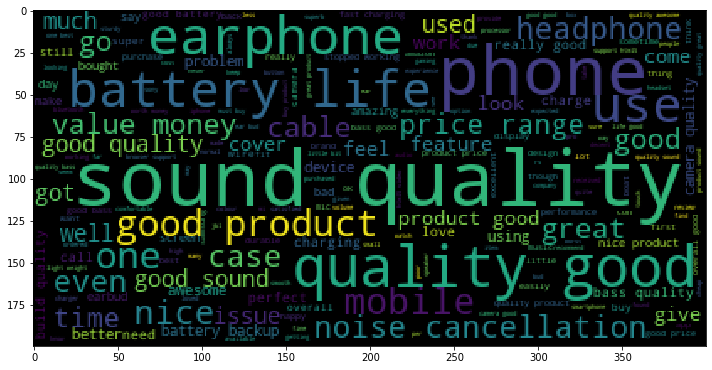

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [24]:
# Using NLTK
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(texts)
nltk_text = nltk.Text(tokens)
#nltk_text.concordance(expression.lower(), width=120, lines=20)

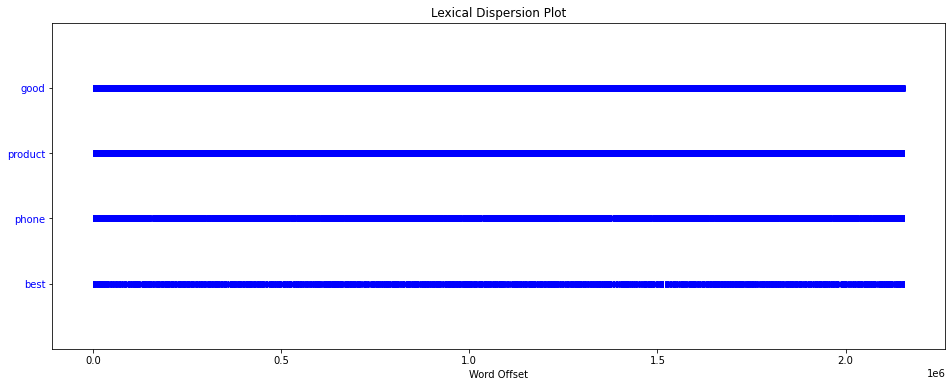

In [25]:
dispersion_words = ['good', 'product', 'phone', 'best']
plt.figure(figsize=(16,6))
nltk_text.dispersion_plot(dispersion_words)

In [26]:
freqdist.most_common(100)

[('good', 27169),
 ('quality', 22089),
 ('product', 17209),
 ('sound', 12522),
 ('phone', 11386),
 ('battery', 7816),
 ('price', 7484),
 ('one', 7260),
 ('also', 7082),
 ('bass', 6768),
 ('like', 5709),
 ('best', 5687),
 ('camera', 5264),
 ('use', 4886),
 ('great', 4800),
 ('really', 4536),
 ('buy', 4458),
 ('using', 4457),
 ('nice', 4293),
 ('charging', 4158),
 ('working', 3639),
 ('time', 3547),
 ('go', 3531),
 ('noise', 3423),
 ('better', 3317),
 ('mobile', 3294),
 ('life', 3223),
 ('earphones', 3197),
 ('case', 3098),
 ('cable', 3054),
 ('well', 3030),
 ('even', 3016),
 ('money', 2935),
 ('much', 2853),
 ('ear', 2849),
 ('get', 2805),
 ('2', 2741),
 ('fast', 2737),
 ('awesome', 2669),
 ('samsung', 2650),
 ('worth', 2646),
 ('used', 2611),
 ('value', 2605),
 ('cancellation', 2589),
 ('range', 2551),
 ('got', 2541),
 ('amazing', 2316),
 ('screen', 2300),
 ('amazon', 2299),
 ('back', 2270),
 ('days', 2244),
 ('bought', 2243),
 ('would', 2224),
 ('cover', 2195),
 ('long', 2180),
 ('ear

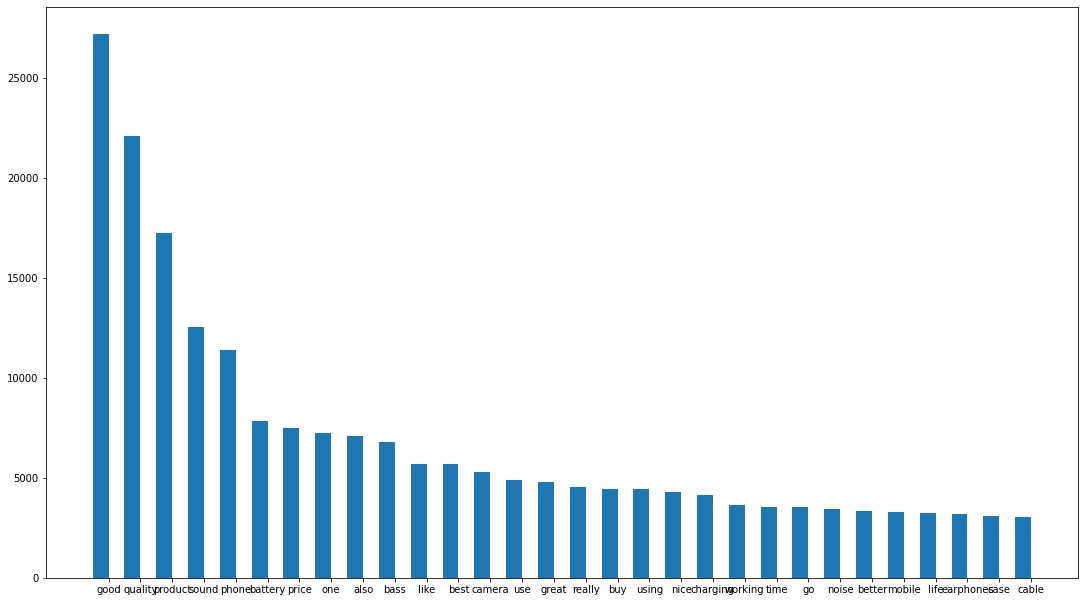

In [27]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [28]:
corpus=[]
new = df5['review_body'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [29]:
#import nltk
#nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))




<BarContainer object of 10 artists>

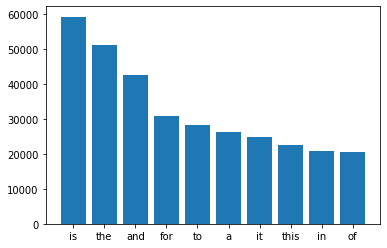

In [30]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)





In [31]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

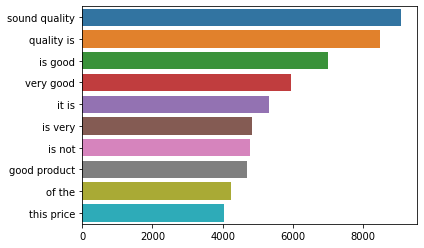

In [33]:
top_n_bigrams=get_top_ngram(df5['review_body'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

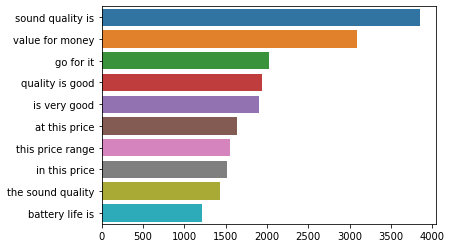

In [34]:
top_tri_grams=get_top_ngram(df5['review_body'],n=3)
x,y = map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [35]:
type(df3.review_body)

pandas.core.series.Series

*III. Data Preparation*
==

**Part 1: Dealing with the text**

1. Remove HTML tags

Regex rule : ‘<.*?>’

In [36]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df3.review_body = df3.review_body.apply(clean)
df3.review_body[48946]

'Sounds effect is good'

2. Remove special characters

In [37]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df3.review_body = df3.review_body.apply(is_special)
df3.review_body[0]

'Great quality and the sound is actually great Pros1  hd sound quality is great it has micro woffers 2  built quality is great wires are thick 3  hd calling is great my voice was clearly audible to other person on the call Cons1  sometimes earbuds hurt the ears and they might not be comfortable to some people otherwise it s a great product'

3. Convert everything to lowercase

In [38]:
def to_lower(text):
    return text.lower()

df3.review_body = df3.review_body.apply(to_lower)
df3.review_body[0]

'great quality and the sound is actually great pros1  hd sound quality is great it has micro woffers 2  built quality is great wires are thick 3  hd calling is great my voice was clearly audible to other person on the call cons1  sometimes earbuds hurt the ears and they might not be comfortable to some people otherwise it s a great product'

4. Remove stopwords

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df3.review_body = df3.review_body.apply(rem_stopwords)
df3.review_body[0]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['great',
 'quality',
 'sound',
 'actually',
 'great',
 'pros1',
 'hd',
 'sound',
 'quality',
 'great',
 'micro',
 'woffers',
 '2',
 'built',
 'quality',
 'great',
 'wires',
 'thick',
 '3',
 'hd',
 'calling',
 'great',
 'voice',
 'clearly',
 'audible',
 'person',
 'call',
 'cons1',
 'sometimes',
 'earbuds',
 'hurt',
 'ears',
 'might',
 'comfortable',
 'people',
 'otherwise',
 'great',
 'product']

5. Stem the words

In [40]:
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

df3.review_body = df3.review_body.apply(stem_txt)
df3.review_body[0]

'great qualiti sound actual great pros1 hd sound qualiti great micro woffer 2 built qualiti great wire thick 3 hd call great voic clear audibl person call cons1 sometim earbud hurt ear might comfort peopl otherwis great product'

In [41]:
#Creat a new data frame withoud laybor
todrop = ['sentiment','Negativo']
df4 = df3.drop(todrop, axis=1)
df4.head()

,index,reviewer_name,title,review_body,review_rating
0,0,Genuine buyer,Pros and cons,great qualiti sound actual great pros1 hd soun...,5.0 out of 5 stars
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,use past 6 month actual earphon search realli ...,5.0 out of 5 stars
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",perfect bass nice one superb sound nois cancel...,5.0 out of 5 stars
3,3,Raj Patel,Maybe buy boat basshead 100,review 1 week usepro 1 best build qualiti even...,4.0 out of 5 stars
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,purchas see review suspicion may result stupid...,5.0 out of 5 stars


In [42]:
#We found that the base is unbalanced with most positive ratings
sentiment_prop = df3.groupby('Negativo')['index'].count()/len(df3)
sentiment_prop

Negativo
0    0.851786
1    0.148214
Name: index, dtype: float64

In [43]:
#Criamos data base com menor observação para analise preliminares de modelos 
df6 = df3.copy()
df6 = df6.sample(80000)
df6.reset_index(drop=True, inplace=True)
df6

,index,reviewer_name,title,review_body,review_rating,sentiment,Negativo
0,268917,Vikas,Good product,sound qualiti nois cancel bass qualiti good va...,5.0 out of 5 stars,positive,0
1,284534,Amazon Customer,Best for 🚗 vent,good,5.0 out of 5 stars,positive,0
2,137574,Mihir Das,Good to go 👍,deliv today use hr sound qualiti seem ok good ...,4.0 out of 5 stars,positive,0
3,242698,Surendra Singh,Bass quality and noise cancellation are batter...,sound qualiti batteri life realli goodi happi ...,5.0 out of 5 stars,positive,0
4,59577,FJ,Good product,good,5.0 out of 5 stars,positive,0
...,...,...,...,...,...,...,...
79995,171013,Nandini Yamdagni,Perfect vin budget gadget,sister love,5.0 out of 5 stars,positive,0
79996,231557,Amazon Customer,Superb !!!,best charg wire,5.0 out of 5 stars,positive,0
79997,162323,Aritra M,Good Product on this price,good product,5.0 out of 5 stars,positive,0
79998,149195,Nikesh,Satisfied with this product,build good sound good bass medium case charg e...,5.0 out of 5 stars,positive,0


In [44]:
del df6['index']
df6

,reviewer_name,title,review_body,review_rating,sentiment,Negativo
0,Vikas,Good product,sound qualiti nois cancel bass qualiti good va...,5.0 out of 5 stars,positive,0
1,Amazon Customer,Best for 🚗 vent,good,5.0 out of 5 stars,positive,0
2,Mihir Das,Good to go 👍,deliv today use hr sound qualiti seem ok good ...,4.0 out of 5 stars,positive,0
3,Surendra Singh,Bass quality and noise cancellation are batter...,sound qualiti batteri life realli goodi happi ...,5.0 out of 5 stars,positive,0
4,FJ,Good product,good,5.0 out of 5 stars,positive,0
...,...,...,...,...,...,...
79995,Nandini Yamdagni,Perfect vin budget gadget,sister love,5.0 out of 5 stars,positive,0
79996,Amazon Customer,Superb !!!,best charg wire,5.0 out of 5 stars,positive,0
79997,Aritra M,Good Product on this price,good product,5.0 out of 5 stars,positive,0
79998,Nikesh,Satisfied with this product,build good sound good bass medium case charg e...,5.0 out of 5 stars,positive,0


**Separating test base from training base for n= 10000 da amostra**

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(df6, df6['Negativo']):
    train_set = df6.loc[train_index]
    test_set = df6.loc[test_index]

In [46]:
#Utilizaremos essa linha de código para validação na amostra completa e desabilitaremos código anterior
#from sklearn.model_selection import StratifiedShuffleSplit
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
#for train_index, test_index in split.split(df3, df3['Negativo']):
 #   train_set = df3.loc[train_index]
#    test_set = df3.loc[test_index]

In [47]:
print(f"Treino: {len(train_set)}\nTeste: {len(test_set)}")

Treino: 64000
Teste: 16000


In [48]:
#Definindo o X e Y da base
train_setx = train_set.copy()
test_setx = test_set.copy()
xtrain = np.array(train_setx.drop('Negativo', axis=1, inplace=True))
xtest = np.array(test_setx.drop('Negativo', axis=1, inplace=True))

In [49]:
ytrain = np.array(train_set['Negativo'])
ytest=np.array(test_set['Negativo'])

In [50]:
Xtest_reg = np.array(test_setx.iloc[:,2].values)
Xtrain_reg = np.array(train_setx.iloc[:,2].values)
ytrain = np.array(train_set.Negativo.values)
ytest = np.array(test_set.Negativo.values)
cv = CountVectorizer(max_features = 2000)
Xtrain_reg = cv.fit_transform(train_setx.review_body).toarray()
Xtest_reg = cv.fit_transform(test_setx.review_body).toarray()
print("X.shape = ",Xtrain_reg.shape)
print("y.shape = ",ytrain.shape)
print("X.shape = ",Xtest_reg.shape)
print("y.shape = ",ytest.shape)

X.shape =  (64000, 2000)
y.shape =  (64000,)
X.shape =  (16000, 2000)
y.shape =  (16000,)


**After identifying which basis is unbalanced, we will use Smote's technique that consists of generating synthetic (non-duplicated) data of the minority class from neighbors.**

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

In [51]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [52]:
X1_train_smote = Xtrain_reg
Y1_train_smote = ytrain
X1_test_smote = Xtest_reg
Y1_test_smote= ytest
X1_train_smote, Y1_train_smote = smt.fit_resample(X1_train_smote, Y1_train_smote)
X1_test_smote, Y1_test_smote = smt.fit_resample(X1_test_smote, Y1_test_smote)

In [53]:
np.bincount(Y1_train_smote)
np.bincount(Y1_test_smote)

array([13650, 13650])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


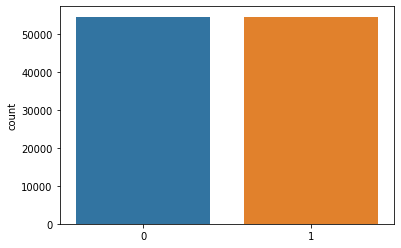

In [54]:
#import seaborn as sns
ax = sns.countplot(Y1_train_smote)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


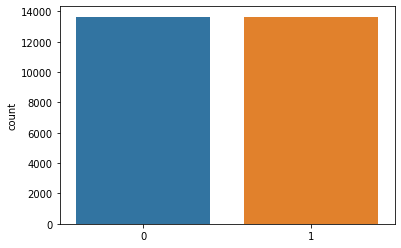

In [55]:
#import seaborn as sns
ax_test = sns.countplot(Y1_test_smote)

**IV. Defining the models and Training them**
==


**Importing modules for evaluation of the models**



In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [57]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)




In [ ]:
#GridSeach para Modelo Gaussiano, para economizar poder computacional , nao rodamos 
#from sklearn.model_selection import GridSearchCV
#param_grid1 = [{'var_smoothing': np.logspace(0,-9, num=100)}]
#clf_gnb_gs = GaussianNB()
#grid_search_clf_gnb_gs = GridSearchCV(clf_gnb_gs, param_grid1, cv=5,
#                           scoring='recall')
#grid_search_clf_gnb_gs.fit(X1_train_smote, Y1_train_smote)

**Bayesian Classifiers**

Classification Report
              precision    recall  f1-score   support

    Positivo       0.60      0.89      0.72     13650
    Negativo       0.78      0.41      0.53     13650

    accuracy                           0.65     27300
   macro avg       0.69      0.65      0.62     27300
weighted avg       0.69      0.65      0.62     27300

ROC Score: 0.6463369963369963
Accuracy Score: 0.6463369963369964
Average Precision Score: 0.6145426170903878
f1 Score: 0.5339126237026309
Confusion matrix, without normalization
[[12115  1535]
 [ 8120  5530]]


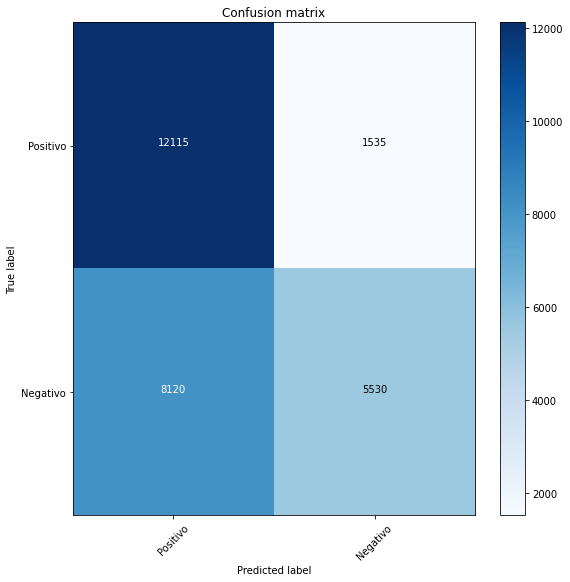

In [58]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(X1_train_smote, Y1_train_smote)

roc_gnb = clf_eval(clf_gnb, X1_test_smote, Y1_test_smote)

Classification Report
              precision    recall  f1-score   support

    Positivo       0.67      0.72      0.69     13650
    Negativo       0.70      0.64      0.67     13650

    accuracy                           0.68     27300
   macro avg       0.68      0.68      0.68     27300
weighted avg       0.68      0.68      0.68     27300

ROC Score: 0.6812454212454212
Accuracy Score: 0.6812454212454212
Average Precision Score: 0.6261593386272417
f1 Score: 0.6687223998781787
Confusion matrix, without normalization
[[9815 3835]
 [4867 8783]]


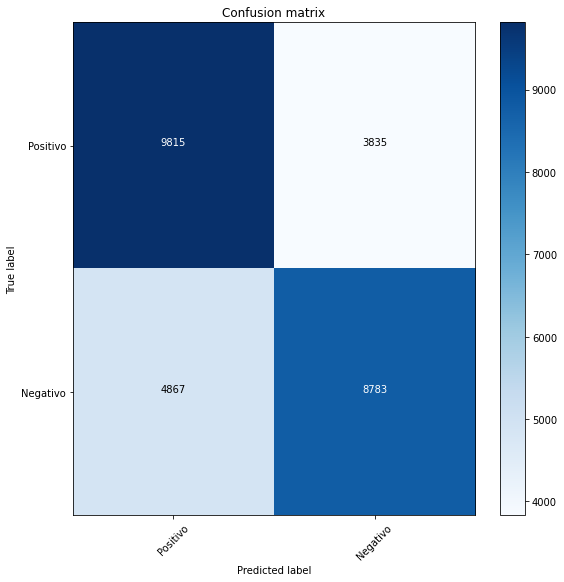

In [59]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(X1_train_smote, Y1_train_smote)

roc_bnb = clf_eval(clf_bnb, X1_test_smote, Y1_test_smote)

In [ ]:
#!pip install imblearn
#!pip install scikit-learn


In [60]:
#Modelo Regressão Linear
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
lr = LogisticRegression(max_iter=200)
clf_lr = lr.fit(X1_train_smote, Y1_train_smote)
pred_train_lr_smote = clf_lr.predict(X1_train_smote)
pred_train_lr_test_smote = clf_lr.predict(X1_test_smote)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [62]:
print(recall_score(Y1_test_smote,pred_train_lr_test_smote))

0.5878388278388278


Classification Report
              precision    recall  f1-score   support

    Positivo       0.60      0.61      0.60     13650
    Negativo       0.60      0.59      0.59     13650

    accuracy                           0.60     27300
   macro avg       0.60      0.60      0.60     27300
weighted avg       0.60      0.60      0.60     27300

ROC Score: 0.5995604395604395
Accuracy Score: 0.5995604395604396
Average Precision Score: 0.5599304551412578
f1 Score: 0.594810971089696
Confusion matrix, without normalization
[[8344 5306]
 [5626 8024]]


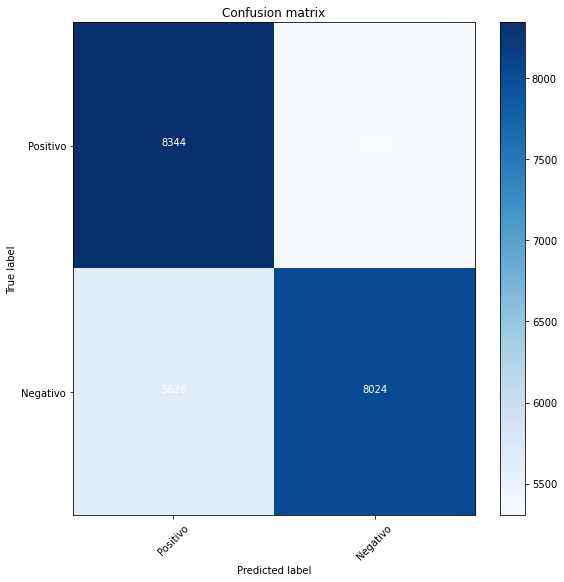

In [61]:
roc_reg_lin = clf_eval(clf_lr, X1_test_smote, Y1_test_smote)

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = [
 #             {'learning_rate': [0.1, 0.05], 'n_estimators': [50, 100], 
  #             'max_depth': [19, 29]}
#              ]
#gb_clf_gscv = GradientBoostingClassifier()

#grid_search_gb = GridSearchCV(gb_clf_gscv, param_grid, cv=5, return_train_score=True)

#grid_search_gb.fit(X1_train_smote, Y1_train_smote)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(X1_train_smote, Y1_train_smote)
pred_train_gb_clf = gb_clf_sa.predict(X1_train_smote)
pred_test_gb_clf = gb_clf_sa.predict(X1_test_smote)


In [ ]:
#Rodando sem balanciamento para teste, nao performou bem no Recall
#gb_clf_sembal = GradientBoostingClassifier()
#gb_clf_sasembal =gb_clf_sembal.fit(Xtrain_reg, ytrain)
#pred_train_gb_clfsembal = gb_clf_sasembal.predict(Xtrain_reg)
#pred_test_gb_clfsembal = gb_clf_sasembal.predict(Xtest_reg)
#roc_gb_sembal = clf_eval(gb_clf_sasembal, Xtest_reg, ytest)

Classification Report
              precision    recall  f1-score   support

    Positivo       0.76      0.08      0.14     13650
    Negativo       0.51      0.98      0.67     13650

    accuracy                           0.53     27300
   macro avg       0.64      0.53      0.41     27300
weighted avg       0.64      0.53      0.41     27300

ROC Score: 0.5264102564102564
Accuracy Score: 0.5264102564102564
Average Precision Score: 0.5135725176489213
f1 Score: 0.6732212814356123
Confusion matrix, without normalization
[[ 1053 12597]
 [  332 13318]]


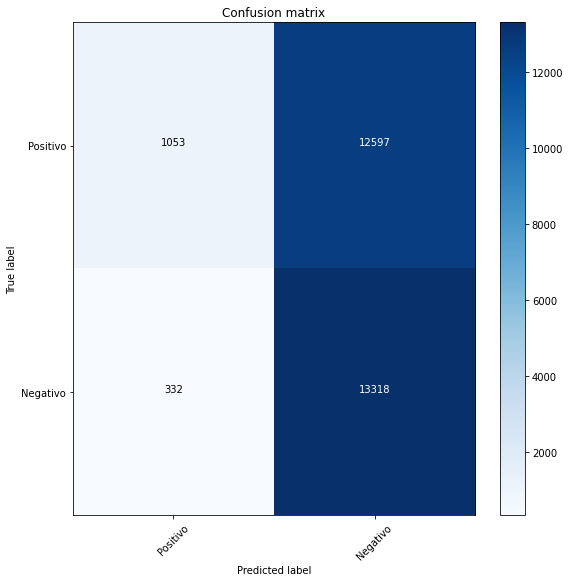

In [64]:
roc_gb = clf_eval(gb_clf_sa, X1_test_smote, Y1_test_smote)

In [66]:
#Salvando modelo 
pickle.dump(gb_clf_sa,open('model1.pkl','wb'))

In [65]:
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('model1.pkl','wb'))

inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = gb_clf_sa.predict(np.array(inp).reshape(1,2000))
y_pred

array([1])

In [67]:
rev2 =  """Best product I could have bought in my life. Undoubtedly, this product is incredible, I have no words to express my joy and satisfaction of having bought from this store. 
I was looking for a complete product and no doubt I found. If someone really looks for quality,that really is the product they should buy. 
The manufacturer was amazing,seller quickly responded all requests, you should buy this product. When I bought the product, I sent a request to the color exchange seller, he immediately made the exchange, showing attention to me and quickly. 
I also thank the company's affection with after sales, no doubt this was my best purchase this year"""
f11 = clean(rev2)
f22 = is_special(f11)
f33 = to_lower(f22)
f44 = rem_stopwords(f33)
f55 = stem_txt(f44)

bow,words = [],word_tokenize(f55)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('model1.pkl','wb'))

inp3 = []
for i in word_dict:
    inp3.append(f55.count(i[0]))
y_pred2 = gb_clf_sa.predict(np.array(inp3).reshape(1,2000))
y_pred2


array([1])

Abaixo estamos fazendo aplicação do modelo que melhor desempenhou para uma base de dados avulsa 

In [68]:
df_books.head(15)

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
5,5,3744,B0021L9YDK,"[6, 6]",5,Aislinn is a little girl with big dreams. Afte...,"12 7, 2009",A3J5NN6MJK4M4A,"Aubrie A. Dionne ""Fantasy, Sci Fi Author""",A story of a little girl with big dreams.,1260144000
6,6,13641,B0038NN38W,"[1, 1]",2,This has the makings of a good story... unfort...,"08 18, 2011",A531QY5K7JVXI,Chicano,This story has potential but ultimately disapp...,1313625600
7,7,4448,B002AJ7X2C,"[1, 1]",4,I got this because I like collaborated short s...,"03 8, 2010",AN8ELR6AHMMQ,"Jessss ""I read to find stories that inspire m...",Good thriller,1268006400
8,8,2797,B001L5T22U,"[0, 0]",5,"Loved this book, I am hooked on this series an...","09 30, 2013",AMSWCFSQ8SLK9,Amazon Customer,Loved it!,1380499200
9,9,5294,B002F3PPVE,"[0, 1]",4,"And that's a good thing. Short, sweet tease th...","07 29, 2009",AB53C7GYZHYIE,"A. Williams ""blkkat""",I was scared...,1248825600


In [69]:
#Rodando com o tratamento dos dados
f111 = df_books.reviewText.apply(clean)
f222 = df_books.reviewText.apply(is_special)
f333 = df_books.reviewText.apply(to_lower)
f444 = df_books.reviewText.apply(rem_stopwords)
f555 = df_books.reviewText.apply(stem_txt)

Xtest_nov2 = np.array(f444)
#Xtrain_reg = np.array(train_setx.iloc[:,3].values)
#ytrain = np.array(train_set.Negativo.values)
#ytest = np.array(test_set.Negativo.values)
cv3 = CountVectorizer(max_features = 2000)
Xtrain_nov2 = cv3.fit_transform(df_books.reviewText).toarray()
y_pred3 = gb_clf_sa.predict(np.array(Xtrain_nov2))
print(y_pred3[10])
print(y_pred3[11])
print(y_pred3[12])
print(y_pred3[13])
print(y_pred3[14])


0
1
1
1
1


In [70]:
#Rodando sem tratamento
Xtest_nov = np.array(df_books.iloc[:,5].values)
#Xtrain_reg = np.array(train_setx.iloc[:,3].values)
#ytrain = np.array(train_set.Negativo.values)
#ytest = np.array(test_set.Negativo.values)
cv2 = CountVectorizer(max_features = 2000)
Xtrain_nov = cv2.fit_transform(df_books.reviewText).toarray()
Xtrain_nov[27]
y_pred2 = gb_clf_sa.predict(np.array(Xtrain_nov))
print(y_pred2[10])
print(y_pred2[11])
print(y_pred2[12])
print(y_pred2[13])
print(y_pred2[14])




0
1
1
1
1


In [71]:
# Setup plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [72]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

history = model.fit(X1_train_smote, Y1_train_smote,
                    validation_data=(X1_test_smote, Y1_test_smote),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10
427/427 [==============================] - 41s 94ms/step - loss: 0.4168 - val_loss: 0.4631
Epoch 2/10
427/427 [==============================] - 40s 95ms/step - loss: 0.1860 - val_loss: 0.4158
Epoch 3/10
427/427 [==============================] - 39s 91ms/step - loss: 0.1657 - val_loss: 0.4083
Epoch 4/10
427/427 [==============================] - 42s 97ms/step - loss: 0.1544 - val_loss: 0.4233
Epoch 5/10
427/427 [==============================] - 39s 90ms/step - loss: 0.1465 - val_loss: 0.4108
Epoch 6/10
427/427 [==============================] - 38s 89ms/step - loss: 0.1393 - val_loss: 0.4339
Epoch 7/10
427/427 [==============================] - 38s 89ms/step - loss: 0.1363 - val_loss: 0.4105
Epoch 8/10
427/427 [==============================] - 38s 88ms/step - loss: 0.1324 - val_loss: 0.4119
Epoch 9/10
427/427 [==============================] - 38s 89ms/step - loss: 0.1284 - val_loss: 0.3885
Epoch 10/10
427/427 [==============================] - 39s 91ms/step - loss: 0.126

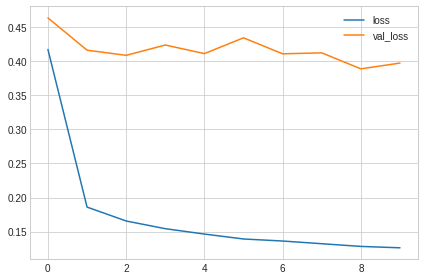

In [73]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [74]:
model1 = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model1.compile(optimizer='adam', loss='mae',)

history1 = model1.fit(X1_train_smote, Y1_train_smote,
                    validation_data=(X1_test_smote, Y1_test_smote),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10
427/427 [==============================] - 41s 92ms/step - loss: 0.4323 - val_loss: 0.4575
Epoch 2/10
427/427 [==============================] - 39s 91ms/step - loss: 0.1886 - val_loss: 0.3943
Epoch 3/10
427/427 [==============================] - 39s 91ms/step - loss: 0.1671 - val_loss: 0.4030
Epoch 4/10
427/427 [==============================] - 40s 93ms/step - loss: 0.1553 - val_loss: 0.3992
Epoch 5/10
427/427 [==============================] - 39s 92ms/step - loss: 0.1472 - val_loss: 0.4305
Epoch 6/10
427/427 [==============================] - 43s 100ms/step - loss: 0.1413 - val_loss: 0.4033
Epoch 7/10
427/427 [==============================] - 39s 91ms/step - loss: 0.1362 - val_loss: 0.4244
Epoch 8/10
427/427 [==============================] - 40s 94ms/step - loss: 0.1325 - val_loss: 0.3964
Epoch 9/10
427/427 [==============================] - 39s 91ms/step - loss: 0.1275 - val_loss: 0.3927
Epoch 10/10
427/427 [==============================] - 38s 89ms/step - loss: 0.12

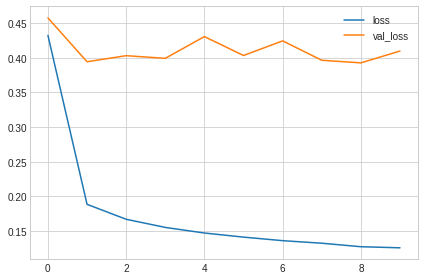

In [75]:
# Show the learning curves
history_df1 = pd.DataFrame(history1.history)
history_df1.loc[:, ['loss', 'val_loss']].plot();

In [76]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.python.keras import utils
from sklearn.metrics import accuracy_score

In [78]:
# The LSTM model I would like to test not performace interesting
# Note: replace LSTM with GRU or RNN if you want to try those

#model2 = Sequential()
#model2.add(LSTM(12, return_sequences=True, input_shape=(X1_train_smote.shape[1],1)))
#model2.add(Dropout(0.2))
#model2.add(LSTM(6, return_sequences=False))
#model2.add(Dropout(0.2))
#model2.add(Dense(1, activation = "linear"))

#model2.compile(loss='mse', optimizer='adam')
#history2 =  model2.fit(X1_train_smote, Y1_train_smote, batch_size=100, epochs=10, validation_data=(X1_test_smote, Y1_test_smote))
#print (model2.summary())

In [79]:
import tensorflow as tf
from keras import regularizers


In [80]:
#Este modelo overfitou
batch_size = int(len(X1_train_smote)/130)
epochs = 30

model7 = tf.keras.Sequential()
model7.add(tf.keras.layers.Dense(8,input_dim=X1_train_smote.shape[1], activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model7.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1(0.005)))
model7.add(tf.keras.layers.BatchNormalization())
model7.add(Flatten())
model7.add(tf.keras.layers.Dense(16, kernel_regularizer=regularizers.l1(0.005)))
model7.add(Activation("relu"))
model7.add(Dropout(0.5))
model7.add(tf.keras.layers.Dense(4, kernel_regularizer=regularizers.l1(0.005)))
model7.add(Activation("relu"))
model7.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l1(0.005)))
model7.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l1(0.005)))


In [81]:
model7.compile(optimizer='adam', loss='mae',
              )

history7 = model7.fit(X1_train_smote, Y1_train_smote,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_data=(X1_test_smote, Y1_test_smote))

Epoch 1/30
130/130 [==============================] - 3s 14ms/step - loss: 1.0979 - val_loss: 0.7298
Epoch 2/30
130/130 [==============================] - 2s 12ms/step - loss: 0.6679 - val_loss: 0.6822
Epoch 3/30
130/130 [==============================] - 2s 12ms/step - loss: 0.6000 - val_loss: 0.6515
Epoch 4/30
130/130 [==============================] - 2s 12ms/step - loss: 0.5511 - val_loss: 0.6315
Epoch 5/30
130/130 [==============================] - 2s 12ms/step - loss: 0.5183 - val_loss: 0.6155
Epoch 6/30
130/130 [==============================] - 2s 12ms/step - loss: 0.4987 - val_loss: 0.6127
Epoch 7/30
130/130 [==============================] - 2s 12ms/step - loss: 0.4812 - val_loss: 0.6007
Epoch 8/30
130/130 [==============================] - 2s 12ms/step - loss: 0.4668 - val_loss: 0.6069
Epoch 9/30
130/130 [==============================] - 2s 12ms/step - loss: 0.4509 - val_loss: 0.6037
Epoch 10/30
130/130 [==============================] - 2s 12ms/step - loss: 0.4366 - val_lo

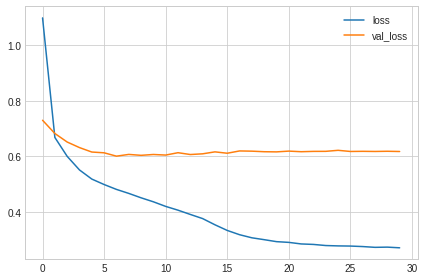

In [82]:
# Show the learning curves
history_df7 = pd.DataFrame(history7.history)
history_df7.loc[:, ['loss', 'val_loss']].plot();

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Epoch 1/50
1707/1707 [==============================] - 6s 3ms/step - loss: 0.5970 - val_loss: 0.4744
Epoch 2/50
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4034 - val_loss: 0.4390
Epoch 3/50
1707/1707 [==============================] - 5s 3ms/step - loss: 0.3045 - val_loss: 0.4157
Epoch 4/50
1707/1707 [==============================] - 5s 3ms/step - loss: 0.2644 - val_loss: 0.4067
Epoch 5/50
1707/1707 [==============================] - 5s 3ms/step - loss: 0.2429 - val_loss: 0.3968
Epoch 6/50
1707/1707 [==============================] - 5s 3ms/step - loss: 0.2256 - val_loss: 0.3873
Epoch 7/50
1707/1707 [==============================] - 6s 3ms/step - loss: 0.2150 - val_loss: 0.3829
Epoch 8/50
1707/1707 [==============================] - 6s 3ms/step - loss: 0.2084 - val_loss: 0.3801
Epoch 9/50
1707/1707 [==============================] - 6s 4ms/step - loss: 0.2036 - val_loss: 0.3779
Epoch 10/50
1707/1707 [==============================] - 6s 3ms/step - loss: 0.199

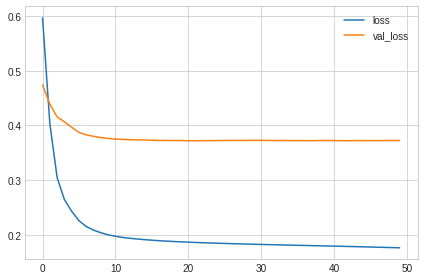

In [84]:
model10 = keras.Sequential([layers.Dense(4, activation='relu'),
                          layers.Dense(4, activation='sigmoid'),
                          layers.Dense(1),
                         ])
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam')
model10.compile(optimizer=opt, loss='mae')
history10 = model10.fit(X1_train_smote, Y1_train_smote,
                    validation_data=(X1_test_smote, Y1_test_smote),
                    batch_size=64,
                    epochs=50,
                    verbose=1,  # turn off training log
                   )

history_df10 = pd.DataFrame(history10.history)
history_df10.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df10['val_loss'].min()))

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
                               patience=20, # how many epochs to wait before stopping
                               restore_best_weights=True,
                              )

model13 = keras.Sequential([layers.Dense(12, activation='relu'),
                            layers.Dropout(0.3),
                            layers.Dense(8, activation='relu'),
                            layers.Dense(8, activation='sigmoid'),
                            layers.Dense(1),
                         ])
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam')
model13.compile(optimizer=opt, loss='mae',metrics=['binary_accuracy'])
history13 = model13.fit(X1_train_smote, Y1_train_smote,
                    validation_data=(X1_test_smote, Y1_test_smote),
                    batch_size=64,
                    epochs=50,
                    callbacks=[early_stopping],
                    verbose=1,  # turn off training log
                   )

Epoch 1/50
1707/1707 [==============================] - 9s 5ms/step - loss: 0.4338 - binary_accuracy: 0.5823 - val_loss: 0.4616 - val_binary_accuracy: 0.6008
Epoch 2/50
1707/1707 [==============================] - 7s 4ms/step - loss: 0.2726 - binary_accuracy: 0.8202 - val_loss: 0.4296 - val_binary_accuracy: 0.6137
Epoch 3/50
1707/1707 [==============================] - 7s 4ms/step - loss: 0.2293 - binary_accuracy: 0.8338 - val_loss: 0.4122 - val_binary_accuracy: 0.6257
Epoch 4/50
1707/1707 [==============================] - 7s 4ms/step - loss: 0.1977 - binary_accuracy: 0.8385 - val_loss: 0.3974 - val_binary_accuracy: 0.6267
Epoch 5/50
1707/1707 [==============================] - 7s 4ms/step - loss: 0.1780 - binary_accuracy: 0.8443 - val_loss: 0.3912 - val_binary_accuracy: 0.6289
Epoch 6/50
1707/1707 [==============================] - 6s 4ms/step - loss: 0.1687 - binary_accuracy: 0.8491 - val_loss: 0.3909 - val_binary_accuracy: 0.6301
Epoch 7/50
1707/1707 [==============================

Minimum validation loss: 0.3892095685005188


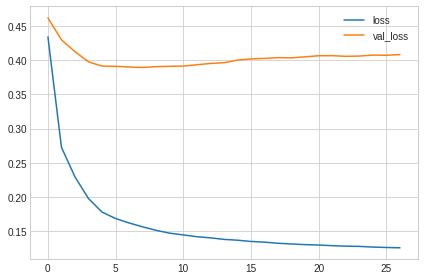

In [86]:
history_df13 = pd.DataFrame(history13.history)
history_df13.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df13['val_loss'].min()))

Classification Report
              precision    recall  f1-score   support

    Positivo       0.64      0.59      0.61     13650
    Negativo       0.62      0.67      0.64     13650

    accuracy                           0.63     27300
   macro avg       0.63      0.63      0.63     27300
weighted avg       0.63      0.63      0.63     27300

ROC Score: 0.6270695970695971
Accuracy Score: 0.6270695970695971
Average Precision Score: 0.5784905029602051
f1 Score: 0.6413499136928876
Confusion matrix, without normalization
[[8016 5634]
 [4547 9103]]


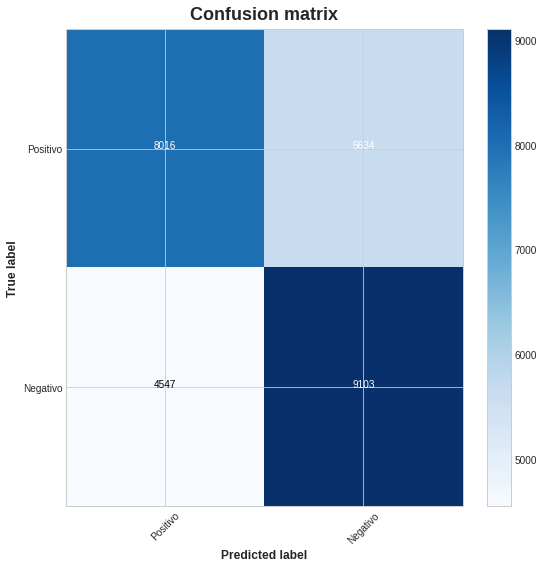

In [89]:
y_pred_redes= (model13.predict(X1_test_smote) > 0.5).astype("int32")

clf_matrix = confusion_matrix(Y1_test_smote, y_pred_redes)
print('Classification Report')
print(classification_report(Y1_test_smote, y_pred_redes, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(Y1_test_smote,y_pred_redes)))
print('Accuracy Score: {}'.format(accuracy_score(Y1_test_smote, y_pred_redes)))
print('Average Precision Score: {}'.format(average_precision_score(Y1_test_smote, y_pred_redes)))
print('f1 Score: {}'.format(f1_score(Y1_test_smote, y_pred_redes)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(Y1_test_smote, y_pred_redes)

In [90]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [92]:
clf_gnb_roc = clf_gnb.predict(X1_test_smote)
clf_bnb_roc = clf_bnb.predict(X1_test_smote)
model_roc = model1.predict(X1_test_smote)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y1_test_smote, clf_gnb_roc)
fpr_bag_lr, tpr_bag_lr, thresholds_bag_lr = roc_curve(Y1_test_smote, pred_train_lr_test_smote)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y1_test_smote, pred_test_gb_clf)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(Y1_test_smote, model_roc)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(Y1_test_smote, clf_bnb_roc)



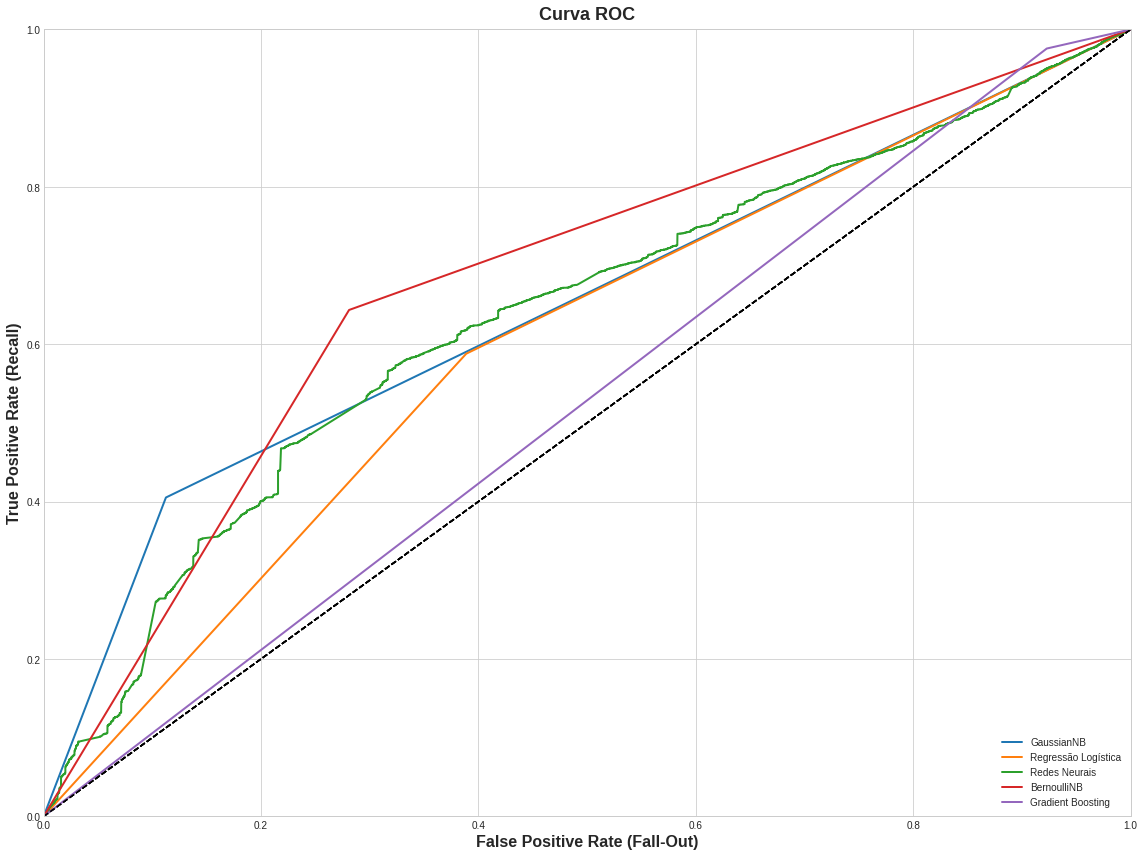

In [93]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='GaussianNB')
plot_roc_curve(fpr_bag_lr, tpr_bag_lr, label='Regressão Logística')
plot_roc_curve(fpr_net, tpr_net_lr, label='Redes Neurais')
plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.legend(loc="lower right")
plt.title('Curva ROC', fontweight="bold")
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [95]:
#função para calcular o cross validation para as métricas accuracy, precision, recall e f1
def resumo_xval_score(model, X, Y):

  accuracy = cross_val_score(model, X, Y,  scoring="accuracy")
  precision = cross_val_score(model, X, Y, scoring="precision")
  recall = cross_val_score(model, X, Y,  scoring="recall")
  f1 = cross_val_score(model, X, Y, scoring="f1")

  return accuracy.mean(), precision.mean(), recall.mean(), f1.mean()

In [106]:
def resumo_xval_score_rede(Y, Ypred):

  accuracy= accuracy_score(Y, Ypred)
  precision = average_precision_score(Y, Ypred)
  recall = recall_score(Y, Ypred)
  f1 = f1_score(Y, Ypred)

  return accuracy.mean(), precision.mean(), recall.mean(), f1.mean()

In [99]:
red_neu = model.fit(X1_train_smote, Y1_train_smote)

3413/3413 [==============================] - 112s 33ms/step - loss: 0.1823


In [109]:
#Score com validação cruzada 5 fold na base de teste após o GridSearch nao tive poder computacional para rodar
from sklearn.model_selection import cross_val_score
score_gs_test_lr = resumo_xval_score(clf_gnb, X1_test_smote, Y1_test_smote)
score_gs_test_bag_lr_2 = resumo_xval_score(clf_lr, X1_test_smote, Y1_test_smote)
#score_gs_test_tree_clf_3 = resumo_xval_score(gb_clf_sa, X1_test_smote, Y1_test_smote)
#score_gs_test_redes = resumo_xval_score(y_pred_redes, X1_test_smote, Y1_test_smote)
score_gs_test_bnb = resumo_xval_score(clf_bnb, X1_test_smote, Y1_test_smote)

In [110]:
score_gs_test_redes2 = resumo_xval_score_rede(Y1_test_smote, y_pred_redes)

In [111]:
#DataFrame com todos os resultados no conjunto de testes após o GridSearch
score_gs_test_df = pd.DataFrame(
   np.array([score_gs_test_lr, score_gs_test_bag_lr_2,score_gs_test_bnb,score_gs_test_redes2]),
    index=['GNB', 'LR','BN','Rede Neural'],
    columns=['Accuracy', 'Precision', 'Recall', 'F1']
    )
score_gs_test_df

,Accuracy,Precision,Recall,F1
GNB,0.634139,0.582100,0.902344,0.701827
LR,0.824945,0.821020,0.826300,0.822226
BN,0.724359,0.663618,0.869377,0.746213
Rede Neural,0.627070,0.578491,0.666886,0.641350


modelo que queremos bater

In [ ]:
#!pip install happytransformer

In [ ]:
from happytransformer import HappyTextClassification

happy_tc = HappyTextClassification(model_type="DISTILBERT",  model_name="distilbert-base-uncased-finetuned-sst-2-english")
result = happy_tc.classify_text("Great movie! 5/5")
print(type(result))  # <class 'happytransformer.happy_text_classification.TextClassificationResult'>
print(result)  # TextClassificationResult(label='POSITIVE', score=0.9998761415481567)
print(result.label)  # LABEL_1

In [ ]:
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""

In [ ]:
df_books.reviewText[10]

In [ ]:
result1 = happy_tc.classify_text(df_books.reviewText[10])
print(type(result1))  # <class 'happytransformer.happy_text_classification.TextClassificationResult'>
print(result1)  # TextClassificationResult(label='POSITIVE', score=0.9998761415481567)
print(result1.label)  # LABEL_1